# Question 1: Convolution Neural Network

A. 
Referring to the accuracy table we get, the accuracy on train set is lower than train set using the default hyper-parameters.

B. 
The accuracy on train set didn't suggesr underfitting. Instead, it may imply overfitting.

C. 
This is correct. Using a dropout of 0.5 helps improving the accuracy over different epochs.

D. This is incorrect. Using L2 regularization of 0.05 results in bad predication accuracy and the loss fluctuated over different epochs. 

In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import os
import random

In [3]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [4]:
# Download data and define the transformer (data normalization)
# Do not change this function
def load_data(seed_value=42):
  MNIST_normalize = transforms.Normalize((0.1307,), (0.3081,))
  MNIST_transform = transforms.Compose([
      transforms.ToTensor(),
      MNIST_normalize
  ])

  # MNIST Dataset
  train = datasets.MNIST(root='./data/',
                                train=True,
                                transform=MNIST_transform,
                                download=True)

  test = datasets.MNIST(root='./data/',
                                train=False,
                                transform=MNIST_transform)

  #print(valid.dataset.data.shape)
  train_subset_size = 5000
  train.data = train.data[0:train_subset_size]
  train.targets = train.targets[0:train_subset_size]

  train_size = int(0.9 * train_subset_size)
  val_size =  int(0.1 * train_subset_size)
  print("train_set_size:", train_size)
  print("val_set_size:", val_size)

  train, valid = random_split(train, [train_size, val_size], generator=torch.Generator().manual_seed(seed_value))

  return train, valid, test

In [5]:
# function to show data
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [6]:
# Data Loader 
def get_data_loaders(dataset, batch_size, shuffle=True):
  loader = torch.utils.data.DataLoader(dataset=dataset,
                                            batch_size=batch_size,
                                            shuffle=shuffle)
  return loader

In [7]:
# Model
class Conv_Net(nn.Module):
    def __init__(self, dropout_value=0.5):
        super(Conv_Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=3)
        self.conv2 = nn.Conv2d(128, 256, kernel_size=3)
        self.mp = nn.MaxPool2d(2)
        self.drop = nn.Dropout(dropout_value)
        self.fc = nn.Linear(6400, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.drop(x)
        x = self.fc(x)
        return F.log_softmax(x)

In [8]:
def train(epoch, train_loader, device):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data).to(device), Variable(target).to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data))


In [9]:
def test(test_loader, device, is_train_set=True):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
      for data, target in test_loader:
          data, target = Variable(data).to(device), Variable(target).to(device)
          output = model(data)
          # sum up batch loss
          test_loss += F.nll_loss(output, target, size_average=False).data
          # get the index of the max log-probability
          pred = output.data.max(1, keepdim=True)[1]
          correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\n{}: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        'Train evaluation' if is_train_set else 'Val/Test evaluation', test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [10]:
seed_everything(seed=42)
# Training settings
batch_size = 128
lr = 0.1
momentum = 0.9 
l2 = 0.0
l2 = 0.05
dropout_value = 0.0
num_epochs = 15
device = 'cuda'

# define the network
model = Conv_Net(dropout_value).to(device)

# define the optimizer 
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay= l2)

train_dataset, val_dataset, test_dataset = load_data()

#divide data to train and val
train_loader = get_data_loaders(train_dataset, batch_size, shuffle=True)
val_loader = get_data_loaders(val_dataset, batch_size, shuffle=False)
test_loader = get_data_loaders(test_dataset, batch_size, shuffle=False)


for epoch in range(1, num_epochs):
    train(epoch, train_loader, device)
    test(train_loader, device, is_train_set=True)
    test(val_loader, device, is_train_set=False)


test(test_loader, device, is_train_set=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

train_set_size: 4500
val_set_size: 500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/4500 (0%)]	Loss: 2.338832
Train Epoch: 1 [1280/4500 (28%)]	Loss: 3.334313
Train Epoch: 1 [2560/4500 (56%)]	Loss: 1.473076
Train Epoch: 1 [3840/4500 (83%)]	Loss: 0.996040


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Train evaluation: Average loss: 0.4005, Accuracy: 3942/4500 (88%)


Val/Test evaluation: Average loss: 0.4562, Accuracy: 422/500 (84%)

Train Epoch: 2 [0/4500 (0%)]	Loss: 0.345444
Train Epoch: 2 [1280/4500 (28%)]	Loss: 0.326122
Train Epoch: 2 [2560/4500 (56%)]	Loss: 0.422967
Train Epoch: 2 [3840/4500 (83%)]	Loss: 0.275839

Train evaluation: Average loss: 0.3043, Accuracy: 4076/4500 (91%)


Val/Test evaluation: Average loss: 0.3380, Accuracy: 444/500 (89%)

Train Epoch: 3 [0/4500 (0%)]	Loss: 0.254402
Train Epoch: 3 [1280/4500 (28%)]	Loss: 0.455375
Train Epoch: 3 [2560/4500 (56%)]	Loss: 0.229005
Train Epoch: 3 [3840/4500 (83%)]	Loss: 0.257708

Train evaluation: Average loss: 0.2937, Accuracy: 4090/4500 (91%)


Val/Test evaluation: Average loss: 0.3663, Accuracy: 439/500 (88%)

Train Epoch: 4 [0/4500 (0%)]	Loss: 0.261013
Train Epoch: 4 [1280/4500 (28%)]	Loss: 0.355754
Train Epoch: 4 [2560/4500 (56%)]	Loss: 0.263890
Train Epoch: 4 [3840/4500 (83%)]	Loss: 0.633509

Train evaluation: Averag

--------------------------------

In [11]:
!pip3 install JSAnimation

  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11424 sha256=783be36c1305da379f2992d5606c205cd33ae6511185cf0f9481df1feb134525
  Stored in directory: /root/.cache/pip/wheels/0e/4e/3d/05fb8cca2646ee0bbfbce17c40a970f48d5e0698b9e5aaa91f
Successfully built JSAnimation


In [12]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import matplotlib.pyplot as plt # data visualization library
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from JSAnimation import IPython_display
from matplotlib import animation
from IPython.display import HTML

# Question 2 : MF Faces

In [13]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

Definition of the data matrix:

In [14]:
D = faces.data

The observations/rows pf the data matrix can be visualized as pictures. 10 consecutive pictures are taken from one person. This are the first 30 pictutres.

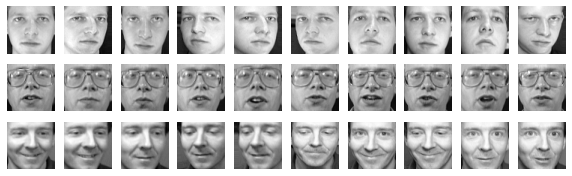

In [15]:
# Here are the first ten guys of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))
    
    ax.imshow(D[i,:].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [16]:
def pca(data):
    # D  is face data
    # M is the mean of each feature, size (4096,)
    M = np.mean(data, axis=0)

    # C Center the data matrix, size: (400, 4096)
    C = D - M

    u, s, vt = np.linalg.svd(C, full_matrices=False)

    # M: (4096,)
    # vh: (400, 4096)
    return u, s, vt, M, C

<font size=5>**Choice A**</font>

(400, 400) (400,) (400, 4096)
A. The picture represented by μF looks like this:


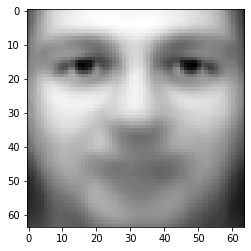

In [17]:
u, s, vt, M, C = pca(D)
print(u.shape, s.shape, vt.shape)
plt.imshow(M.reshape(64, 64), cmap=plt.cm.gray)
print("A. The picture represented by μF looks like this:")
plt.show()

<font size=5>**Choice B**</font>

B. The reconstruction of the second picture when using 25, 50 and 100 principal components looks like this:


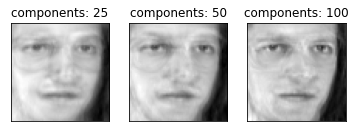

In [18]:
principal_components = [25, 50, 100]

plt.figure()
plt.title('A=U*S*Vh')
print("B. The reconstruction of the second picture when using 25, 50 and 100 principal components looks like this:")
for index, i in enumerate(principal_components):
    vr = vt[:i,].T
    P = C @ vr
    reconstruct = np.dot(P[:, 0:i], vr.T)[1]+ M
    plt.subplot(1, len(principal_components), index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title("components: "+ str(i))
    plt.imshow(reconstruct.reshape(64, 64), cmap=plt.cm.gray)
plt.show()

<font size=5>**Choice C**</font>

C. The pictures which visualize the first four principal component directions:


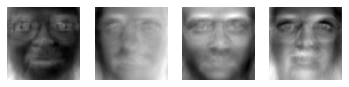

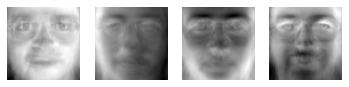

In [19]:
vr = vt[:4,].T
# print(P[:,0:4].shape)
# print(vr.shape)
reconstruct = vr.T
fig = plt.figure()

print("C. The pictures which visualize the first four principal component directions:")
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    ax.imshow(reconstruct[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')
reconstruct2 = -vr.T
fig = plt.figure()
for j in range(4):
    ax = plt.subplot(2, 4, j + 1)
    ax.imshow(reconstruct2[j].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')
plt.show() 

<font size=5>**Choice D**</font>

This is exactly how we get the results in *choice B*, thus, this choice is right.

# Question 3: 

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import TruncatedSVD

In [21]:
faces = fetch_olivetti_faces()
D = faces.data
svd = TruncatedSVD(n_components=4)
d_reduced = svd.fit_transform(D)
svd.fit(D)

TruncatedSVD(n_components=4)

<font size=5>**Choice A**</font>

A.for r = 4 we get the following features:


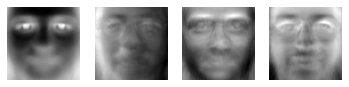

In [22]:
u, s, vh = np.linalg.svd(D, full_matrices=False)
X = vh
print("A.for r = 4 we get the following features:")
# print(X.shape)
Y = u * s
# print(Y.shape)
reconstruct = np.dot(Y, X)
fig = plt.figure()
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    ax.imshow(X[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')
plt.show()

<font size=5>**Choice B**</font>

B: pictures represented by the five centroids when r = 5


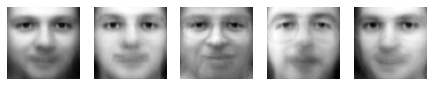

In [23]:
from sklearn.cluster import KMeans

r = 5
kmeans = KMeans(n_clusters=r).fit(D)
centroids = kmeans.cluster_centers_
s = centroids[centroids[:,0].argsort()]
pics = np.row_stack(([s[3, :], s[2, :], s[1, :], s[4, :], s[0, :]]))

print("B: pictures represented by the five centroids when r = 5")
fig = plt.figure(figsize=(7.5, 1.5))
for i in range(0, r):
    ax = plt.subplot2grid((1, r), (int(i/r), i-int(i/r)*r))
    ax.imshow(pics[i,:].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

These 5 pictures are the same as the ones shown in choice B.

B: reconstruct the second picture with the above 5 pictures and the given factors in choice B


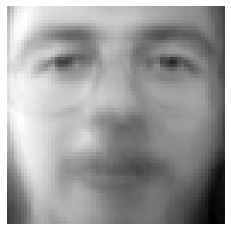

In [24]:
# reconstruction of pictures with centroids
XX = pics.T
pic2 = -1.2 * XX[:, 4] + 2.4 * XX[:, 3] + 0.3 * XX[:, 0] + 0.1 * XX[:, 1] + 0.2 * XX[:, 2]

print("B: reconstruct the second picture with the above 5 pictures and the given factors in choice B")
fig = plt.figure()
ax = plt.subplot2grid((1, 1), (0, 0))
ax.imshow(pic2.reshape(64, 64), cmap=plt.cm.gray)
ax.set_axis_off()


We can find that if we multiple each picture with the given factor, the resulted picture is not the same as the original second picture. Therefore, B is wrong.

<font size=5>**Choice C**</font>

In [25]:
r = 3
kmeans = KMeans(n_clusters=r).fit(D)
centroids_3 = kmeans.cluster_centers_

isIn = False
for i in range(0, centroids_3.shape[0]):
    isIn = False
    for j in range(0, centroids.shape[0]):
        if (centroids_3[i, :] == centroids[j, :]).all():
            isIn = True
    if isIn == True:
        break
if isIn == False:
    print("The centroids of a k-means clustering with r = 3 clusters are not a subset of the centroids of a k-means clustering with r = 5 clusters.")
else:
    print("The centroids of a k-means clustering with r = 3 clusters are a subset of the centroids of a k-means clustering with r = 5 clusters.")

print("r = 3")
print(centroids_3)
print("r = 5")
print(centroids)

The centroids of a k-means clustering with r = 3 clusters are not a subset of the centroids of a k-means clustering with r = 5 clusters.
r = 3
[[0.31391186 0.33743113 0.36811295 ... 0.4173209  0.38312674 0.37258953]
 [0.34349173 0.35464013 0.38274795 ... 0.38761193 0.40000865 0.39669424]
 [0.48591897 0.53889686 0.5956252  ... 0.22433078 0.2232753  0.22493711]]
r = 5
[[0.272469   0.28454286 0.30165288 ... 0.46319732 0.43188274 0.4197443 ]
 [0.32253742 0.33303553 0.356377   ... 0.392562   0.40680143 0.39887202]
 [0.44735605 0.48565477 0.5289928  ... 0.27272728 0.2716858  0.27729625]
 [0.5        0.557453   0.6324804  ... 0.19670418 0.20093596 0.19570847]
 [0.3968418  0.44347697 0.48701298 ... 0.35714287 0.3146399  0.3116145 ]]


<font size=5>**Choice D**</font>

D. The pictures represented of r = 3 is subset of r = 5:


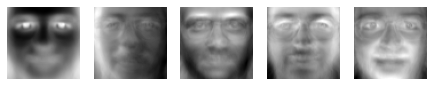

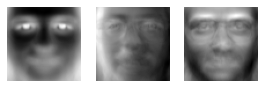

In [26]:
print("D. The pictures represented of r = 3 is subset of r = 5:")

kmeans_5 = KMeans(n_clusters=5, random_state=0)
clusters = kmeans_5.fit_predict(D)
centrods = kmeans_5.cluster_centers_
fig = plt.figure(figsize=(7.5, 1.5))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    ax.imshow(X[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')
plt.show()

# print(kmeans_5.cluster_centers_)

kmeans_3 = KMeans(n_clusters=3, random_state=0)
clusters = kmeans_3.fit_predict(D)
# print(kmeans_3.cluster_centers_.shape)
# print(kmeans_3.cluster_centers_)

fig = plt.figure(figsize=(4.5, 1.5))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    ax.imshow(X[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')
plt.show()

# Question 4: k-means Initialization

In [27]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csr_matrix, find, triu
import scipy
import pandas
from itertools import cycle, islice
import sys

In [28]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']),3)))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

The functions generating the datasets are given here. Every function gets as input the noise parameter ``epsilon`` and the number of points ``n`` to be sampled. It returns a tupel of the shape of clusters being generated, the dataset and the true cluster labels. 

In [29]:
def generateMoons(epsilon, n):
    scaler = MinMaxScaler(feature_range=(0, 3))
    moons, labels = datasets.make_moons(n_samples=n, noise=epsilon, random_state=7)
    scaler.fit(moons)
    return "moons", scaler.transform(moons), labels, 2
def generateBlobs(epsilon, n):
    scaler = MinMaxScaler(feature_range=(0, 3))
    blobs, labels = datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 1, epsilon + 2.5, epsilon + 0.5], random_state=17)
    scaler.fit(blobs)
    return "blobs", scaler.transform(blobs), labels, 3
def generateCircles(epsilon, n):
    scaler = MinMaxScaler(feature_range=(0, 3))
    circles, labels = datasets.make_circles(n_samples=n, factor=.5, noise=epsilon, random_state=27)
    scaler.fit(circles)
    return "circ", scaler.transform(circles), labels, 2
def generateAniso(epsilon,n):
    scaler = MinMaxScaler(feature_range=(0, 3))
    A, labels = datasets.make_blobs(n_samples=n, random_state=170)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    aniso = np.dot(A, transformation)
    scaler.fit(aniso)
    return "ani", scaler.transform(aniso), labels, 3

Implement the centroid initialization here. Right now, it returns a random initialization. 

This is the $k$-means implementation from the lecture accompanying notebook.

In [30]:
def init_centroids_pp(D,r):
    '''
        :param r: (int) number of centroids (clusters)
        :param D: (np-array) the data matrix
        :return: (np-array) 'X' the selected centroids from the dataset
    '''   
    # X = np.random.rand(d,r)*3
    X = np.random.rand(2,r)*3
    return X

In [31]:
def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)

In [32]:
def getY(labels):
    Y = np.zeros((len(labels), max(labels)+1))
    for i in range(0, len(labels)):
        Y[i, labels[i]] = 1
    return Y
def update_centroid(D,Y):
    cluster_sizes = np.diag(Y.T@Y).copy()
    cluster_sizes[cluster_sizes==0]=1
    return D.T@Y/cluster_sizes
def update_assignment(D,X):
    dist = np.sum(D**2,1).reshape(-1,1)  - 2* D@X + np.sum(X**2,0)
    labels = np.argmin(dist,1)
    return getY(labels)
def kmeans(D,r, X_init, epsilon=0.00001, t_max=10000):
    X = X_init.copy()
    Y = update_assignment(D,X)
    rss_old = RSS(D,X,Y) +2*epsilon
    t=0
    #Looping as long as difference of objective function values is larger than epsilon
    while rss_old - RSS(D,X,Y) > epsilon and t < t_max-1:
        rss_old = RSS(D,X,Y)
        X = update_centroid(D,Y)
        Y = update_assignment(D,X)
        t+=1
    print(t,"iterations")
    return X,Y

Following is the function inplementing K-means++.

In [33]:
def init_centroids(D, r):
    n = D.shape[0]
    i = np.random.randint(0, n - 1)
    # X: each column is a centroid, D: each row is a datapoint
    X = D[i, :].T
    s = 1
    while s < r:
        # maxIndex = -1
        distSum = 0.0
        dist = np.zeros(n)
        for i in range(0, n):
            # minDist: distance to the nearest centroid(distance to the centroid which is the center of the cluster the datapoint belongs to)
            minDist = sys.maxsize
            for j in range(0, s):
                if s == 1:
                    d = np.sum(np.power(X[:].T - D[i, :], 2))
                else:
                    d = np.sum(np.power(X[:, j].T - D[i, :], 2))
                if d < minDist:
                    minDist = d
            dist[i] = minDist
            distSum += minDist

        # select next centroid, the larger the dist, the higher the possibility to be the centroid
        # weighted random sampling
        distSum *= np.random.random()
        i = -1
        for j in range(n):
            distSum -= dist[j]
            if distSum <= 0:
                i = j
                break
        # i: index of the next centroid
        X = np.column_stack((X, D[i, :].T))
        s += 1

    return X

We generate a dataset.

In [34]:
n=500
dataID, D, labels, r = generateBlobs(0.05,n)
#dataID, D, labels, r = generateMoons(0.05,n)
#dataID, D, labels, r = generateAniso(0.05,n)
#dataID, D, labels, r = generateCircles(0.05,n)

Run kmeans and spectral clustering based on the initialization technique.

Plot the clustering. The initial centroids are marked in red, and the final centroids are marked in blue. Note, that this kind of centroid visualization will however not work for spectral clustering.



Test for implemented K-means++ initialization:
6 iterations


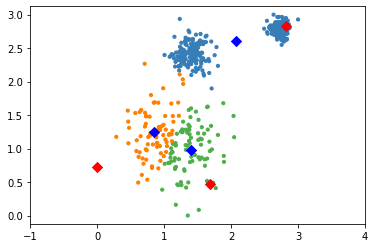

In [35]:
print("Test for implemented K-means++ initialization:")

X_init = init_centroids(D,r)
X,Y = kmeans(D,r, X_init)

fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
ax.scatter(D[:, 0], D[:, 1], c=colors[np.argmax(Y,axis=1)], s=10)
# X_init: coordinates of the initial centroid; X: coordinates of the final centroid
ax.scatter(X_init.T[:, 0], X_init.T[:, 1], c='red', s=50, marker = 'D')
ax.scatter(X.T[:, 0], X.T[:, 1], c='blue', s=50, marker = 'D')

<font size=5>**Choice A:**</font> 

The k-means++ initialization leads to suitable clusterings of the **blobs** dataset in most cases.

3 iterations


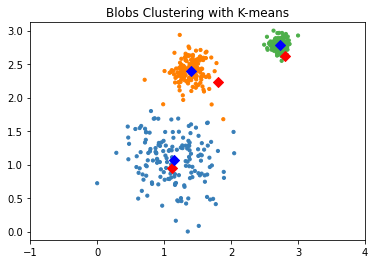

In [36]:
dataID, D, labels, r = generateBlobs(0.05,n)
X_init = init_centroids(D,r)
X,Y = kmeans(D,r, X_init)

fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title('Blobs Clustering with K-means')
ax.scatter(D[:, 0], D[:, 1], c=colors[np.argmax(Y,axis=1)], s=10)
ax.scatter(X_init.T[:, 0], X_init.T[:, 1], c='red', s=50, marker = 'D')
ax.scatter(X.T[:, 0], X.T[:, 1], c='blue', s=50, marker = 'D')

<font size=5>**Choice B:**</font> 

The k-means++ initialization does not lead to suitable clusterings of the **aniso** dataset in most cases.

11 iterations


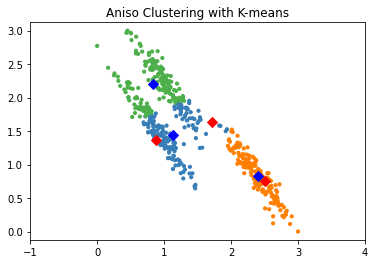

In [37]:
dataID2, D2, labels2, r2 = generateAniso(0.05,n)

X_init2 = init_centroids(D2,r2)
X2,Y2 = kmeans(D2,r2, X_init2)
fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title('Aniso Clustering with K-means')
ax.scatter(D2[:, 0], D2[:, 1], c=colors[np.argmax(Y2,axis=1)], s=10)
ax.scatter(X_init2.T[:, 0], X_init2.T[:, 1], c='red', s=50, marker = 'D')
ax.scatter(X2.T[:, 0], X2.T[:, 1], c='blue', s=50, marker = 'D')

In [38]:
def spectral_clustering(W,r):
    L = np.diag(np.array(W.sum(0))[0]) - W
    Lambda, V = scipy.sparse.linalg.eigsh(L, k=r+1, which="SM")

    A = V[:,1:]
    X_init = init_centroids(A,r)
    X, Y = kmeans(A, r, X_init)
    return X, Y, X_init

<font size=5>**Choice C:**</font> 

The k-means++ initialization in spectral clustering leads to suitable clusterings of the **circles** dataset in most cases.

**Remark:** If the clustering is not successful, please run multiple times.

7 iterations


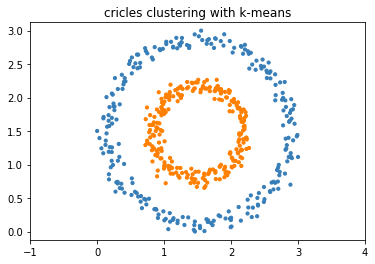

In [39]:
dataID3, D3, labels3, r3 = generateCircles(0.05, n)
dataset_pd = pandas.DataFrame(D3)

N = kneighbors_graph(dataset_pd, n_neighbors=30, include_self=False, n_jobs=-1)
W = 0.5 * (N + N.T)

X, Y, X_init = spectral_clustering(W, r3)

fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title('cricles clustering with k-means')
ax.scatter(D3[:, 0], D3[:, 1], c=colors[np.argmax(Y, axis=1)], s=10)

<font size=5>**Choice D:**</font> 

The k-means++ initialization in spectral clustering leads to suitable clusterings of the **moons** dataset in most cases. **D is the wrong choice.**

**Remark:** If the clustering is not successful, please run multiple times.

6 iterations


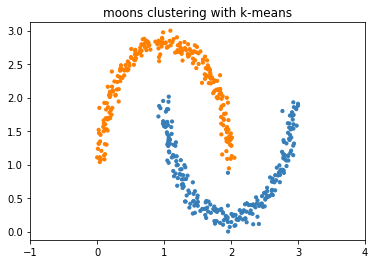

In [68]:
dataID3, D3, labels3, r3 = generateMoons(0.05, n)
dataset_pd = pandas.DataFrame(D3)

N = kneighbors_graph(dataset_pd, n_neighbors=30, include_self=False, n_jobs=-1)
W = 0.5 * (N + N.T)

X, Y, X_init = spectral_clustering(W, r3)

fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title('moons clustering with k-means')
ax.scatter(D3[:, 0], D3[:, 1], c=colors[np.argmax(Y, axis=1)], s=10)

# Question 5 : Movielens
To read the dataset you might need to alter the path to look for it:

In [41]:
# lets explore movies.csv
movies= pd.read_csv('ml-latest-small/movies.csv')
movies.head()

movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]

In [42]:
# lets explore ratings.CSV
ratings=pd.read_csv('ml-latest-small/ratings.csv',sep=',')
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

The original ratings are in the range of 0.5 and 5:

In [43]:
min(ratings["rating"]), max(ratings["rating"])

(0.5, 5.0)

We convert the sparse representation of movie ratings into a data matrix. The missing values are filled with zeros.

In [44]:
df_movie_ratings = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)  #fill unobserved entries with μ
df_movie_ratings.head()

movieId  1       2       3       4       ...  193583  193585  193587  193609
userId                                   ...                                
1           4.0     0.0     4.0     0.0  ...     0.0     0.0     0.0     0.0
2           0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
3           0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
4           0.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
5           4.0     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0

[5 rows x 9724 columns]

We consider here only the movies which have been rated by more than 200 users. That are 18 movies. We will not be able to infer a pattern for movies with very few observations anyways, but for this exercise we are mostly interested in the prnciple and do not need a big dataset.

In [45]:
np.sum(np.sum(df_movie_ratings!=0,0)>200)

18

In [46]:
keep_movie = np.sum(df_movie_ratings!=0,0)>200
df_D = df_movie_ratings.loc[:,keep_movie]
df_D.head()

movieId  1     47    50    110   150   260   ...  593   780   1196  2571  2858  2959
userId                                       ...                                    
1         4.0   5.0   5.0   4.0   0.0   5.0  ...   4.0   3.0   5.0   5.0   5.0   5.0
2         0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
3         0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
4         0.0   2.0   0.0   0.0   0.0   5.0  ...   5.0   0.0   5.0   1.0   5.0   2.0
5         4.0   0.0   4.0   4.0   3.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0

[5 rows x 18 columns]

Furthermore, we will throw out all the users which have not rated more than five movies.

In [47]:
np.sum(np.sum(df_D!=0,1)>5)

344

The resulting dataset has the userID as rows and movieIDs as columns. Hence, userID 1 and 4 addresses the first two rows of this dataset.

In [48]:
keep_user = np.sum(df_D!=0,1)>5
df_D = df_D.loc[keep_user,:]
df_D.head()

movieId  1     47    50    110   150   260   ...  593   780   1196  2571  2858  2959
userId                                       ...                                    
1         4.0   5.0   5.0   4.0   0.0   5.0  ...   4.0   3.0   5.0   5.0   5.0   5.0
4         0.0   2.0   0.0   0.0   0.0   5.0  ...   5.0   0.0   5.0   1.0   5.0   2.0
5         4.0   0.0   4.0   4.0   3.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
6         0.0   4.0   1.0   5.0   4.0   0.0  ...   4.0   5.0   0.0   0.0   0.0   0.0
7         4.5   0.0   4.5   0.0   4.5   5.0  ...   5.0   4.5   4.0   0.0   4.0   0.0

[5 rows x 18 columns]

The movie number- title assignments are given as follows:

In [49]:
movies.loc[movies['movieId'].isin(df_D.columns)]

movieId  ...                                       genres
0           1  ...  Adventure|Animation|Children|Comedy|Fantasy
43         47  ...                             Mystery|Thriller
46         50  ...                       Crime|Mystery|Thriller
97        110  ...                             Action|Drama|War
123       150  ...                         Adventure|Drama|IMAX
224       260  ...                      Action|Adventure|Sci-Fi
257       296  ...                  Comedy|Crime|Drama|Thriller
277       318  ...                                  Crime|Drama
314       356  ...                     Comedy|Drama|Romance|War
418       480  ...             Action|Adventure|Sci-Fi|Thriller
461       527  ...                                    Drama|War
507       589  ...                                Action|Sci-Fi
510       593  ...                        Crime|Horror|Thriller
615       780  ...             Action|Adventure|Sci-Fi|Thriller
898      1196  ...                      Action|Adventure|Sci-Fi
1939     2571  ...                       Action|Sci-Fi|Thriller
2145     2858  ...                                Drama|Romance
2226     2959  ...                  Action|Crime|Drama|Thriller

[18 rows x 3 columns]

The resulting data matrix is given as follows:

In [50]:
D = df_D.to_numpy()
D.shape

(344, 18)

In [51]:
t_max = 100
λ = 0.00001
r = 5

In [52]:
def matrix_completion(D, r, λ):
    n = D.shape[0]
    d = D.shape[1]
    X = np.random.rand(d * r).reshape(d, r)
    Y = np.random.rand(n * r).reshape(n, r)
    O = indicator_nonzero(D)
    t = 1
    MESO = np.zeros(t_max)
    while t <= t_max:
        for k in range(0, d):
            O_X = np.zeros(n)
            for j in range(0, n):
                O_X[j] = O[j, k]
            O_X = np.diag(O_X)
            X[k, :] = D[:, k].T@Y@np.linalg.inv(Y.T@O_X@Y + λ)

        for i in range(0, n):
            O_Y = np.zeros(d)
            for j in range(0, d):
                O_Y[j] = O[i, j]
            O_Y = np.diag(O_Y)
            Y[i, :] = D[i, :]@X@np.linalg.inv(X.T@O_Y@X + λ)

        MESO[t - 1] = np.sum(np.power(D - O * (Y@X.T), 2)) / np.sum(O)
        t += 1
    return X, Y, MESO

def indicator_nonzero(D):
    n = D.shape[0]
    d = D.shape[1]
    O = np.zeros(n * d).reshape(n, d)
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            if D[i][j] != 0:
                O[i][j] = 1
    return O

In [53]:
X, Y, MESO = matrix_completion(D, r, λ)

<font size=5>**(a)**</font>

Plot the iterations t against the Mean Squared Error on the Observed (MSEO) entries for the corresponding iterate (X, Y ) on the MovieLens data:

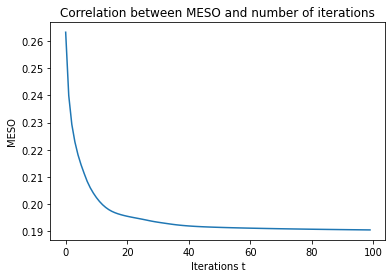

In [54]:
# plot: iterations aganst MSEO
t = np.array([i for i in range(MESO.shape[0])])

plt.figure()
plt.title("Correlation between MESO and number of iterations")
ax = plt.gca()
ax.set_xlabel('Iterations t')
ax.set_ylabel('MESO')
ax.plot(t, MESO)
plt.show()

<font size=5>**(b)**</font>

No, $X_{k⋅}$ is not the minimizer for the objective in equation(5). The objective is convex as it is the sum of convex functions. However, X and Y in objective function may not in feasible set.

<font size=5>**(c)**</font>

Stopping criterion

In [55]:
import math

In [56]:
def matrix_completion_modified(D, r, λ):
    n = D.shape[0]
    d = D.shape[1]
    X = np.random.rand(d * r).reshape(d, r)
    Y = np.random.rand(n * r).reshape(n, r)
    O = indicator_nonzero(D)
    t = 1
    MESO = np.zeros(t_max)
    threshold = 1e-3
    while t <= t_max:
        if t >= 3 and math.isclose(MESO[t - 2], MESO[t - 3], rel_tol=threshold):
            break
        for k in range(0, d):
            O_X = np.zeros(n)
            for j in range(0, n):
                O_X[j] = O[j, k]
            O_X = np.diag(O_X)
            X[k, :] = D[:, k].T@Y@np.linalg.inv(Y.T@O_X@Y + λ)

        for i in range(0, n):
            O_Y = np.zeros(d)
            for j in range(0, d):
                O_Y[j] = O[i, j]
            O_Y = np.diag(O_Y)
            Y[i, :] = D[i, :]@X@np.linalg.inv(X.T@O_Y@X + λ)

        MESO[t - 1] = np.sum(np.power(D - O * (Y@X.T), 2)) / np.sum(O)
        t += 1
    return X, Y, MESO, t - 1

In [57]:
X2, Y2, MESO2, t2 = matrix_completion_modified(D, r, λ)
print(t2, "iterations")

38 iterations


In [58]:
print("MSEO obtained for 100 iterations: ", MESO[MESO.shape[0] - 1])
print("MSEO derived by stopping criterion: ", MESO2[t2 - 1])

MSEO obtained for 100 iterations:  0.19043264032403565
MSEO derived by stopping criterion:  0.20628205947669684


We can find that when the iterate is convergent, the difference of MSEO between the two iterations is small. Here, we set the threshold 1e-3, that means, if the difference of MSEO between two consecutive iterations is smaller than 1e-3, then the program stops.

Using this strategy, the final MSEO is close to the MSEO derived after 100 iterations, both are around 0.20.

<font size=5>**(d)**</font>

Choose the suitable λ for the recommendations of the first three users based on interpretability and MSEO.


In [84]:
λ = 1
X5, Y5, MESO5, t5= matrix_completion_modified(D, r, λ)
recon5 = Y5@X5.T
df = pd.DataFrame(np.around(recon5[0:3, :], 2))
df

0     1     2     3     4     5   ...    12    13    14    15    16    17
0  3.91  4.26  4.67  4.26  3.69  5.06  ...  4.51  3.22  5.03  4.50  4.66  4.63
1  1.51  2.05  3.46  1.86  0.50  5.02  ...  2.49  0.88  4.92  1.75  4.42  2.89
2  4.02  4.31  4.04  3.36  3.32  2.95  ...  4.10  2.15  2.99  3.62  4.12  4.44

[3 rows x 18 columns]

In [85]:
λ = 0.5
X4, Y4, MESO4, t4= matrix_completion_modified(D, r, λ)
recon4 = Y4@X4.T
df = pd.DataFrame(np.around(recon4[0:3, :], 2))
df

0     1     2     3     4     5   ...    12    13    14    15    16    17
0  3.86  4.12  4.66  4.45  4.15  4.80  ...  4.31  3.30  4.80  4.69  4.94  4.38
1  8.12  1.74  3.13  1.79  5.57  4.65  ...  5.44  9.16  4.63  1.81  5.05  1.24
2  3.98  4.01  4.22  3.32  3.18  4.11  ...  4.47  2.82  4.05  3.85  4.00  4.27

[3 rows x 18 columns]

In [86]:
λ = 0.1
X3, Y3, MESO3, t3= matrix_completion_modified(D, r, λ)
recon3 = Y3@X3.T
df = pd.DataFrame(np.around(recon3[0:3, :], 2))
df


0     1     2     3      4     5   ...    12    13    14    15    16    17
0   4.07  4.06  4.59  4.13   3.93  5.20  ...  4.34  3.11  5.21  4.43  4.88  4.52
1  12.84  2.02  2.87 -8.14  15.60  5.22  ...  4.81  8.63  4.86  1.06  5.02  1.43
2   4.13  5.22  3.80  3.70   2.94  3.21  ...  4.66  3.06  3.12  3.38  1.30  3.91

[3 rows x 18 columns]

In [87]:
λ = 0.0001
X22, Y22, MESO22, t22= matrix_completion_modified(D, r, λ)
recon22 = Y22@X22.T
df = pd.DataFrame(np.around(recon22[0:3, :], 2))
df

0     1     2     3     4     5   ...    12    13    14    15    16    17
0  3.99  4.25  4.61  4.48  3.89  4.59  ...  4.51  3.30  4.60  4.36  5.28  4.45
1  6.77  2.64  3.56  1.00  5.50  5.05  ...  4.67  7.33  5.03  1.00  5.02  1.55
2  4.17  5.30  4.03  3.83  3.13  3.83  ...  4.80  4.23  3.85  3.69  2.57  5.58

[3 rows x 18 columns]

λ = 1, MSEO =  0.208647869422322
λ = 0.5, MSEO =  0.19621998920786946
λ = 0.1, MSEO =  0.18822081617450714
λ = 0.0001, MSEO =  0.19888215736607712


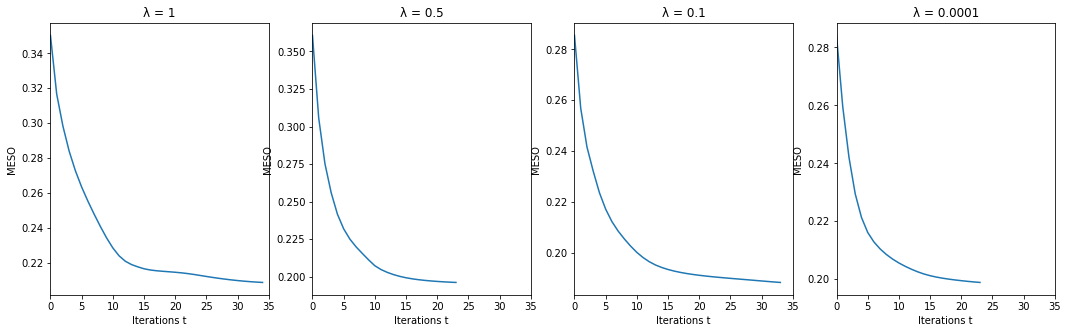

In [88]:
print("λ = 1, MSEO = ", MESO5[t5 - 1])
print("λ = 0.5, MSEO = ", MESO4[t4 - 1])
print("λ = 0.1, MSEO = ", MESO3[t3 - 1])
print("λ = 0.0001, MSEO = ", MESO22[t22 - 1])

t222 = np.array([i for i in range(t22)])
t33 = np.array([i for i in range(t3)])
t44 = np.array([i for i in range(t4)])
t55 = np.array([i for i in range(t5)])

x_max = max(t22, t3, t4, t5)


plt.figure(4, figsize=(18, 5))

plt.subplot(1,4,1)
plt.title("λ = 1")
plt.xlim(xmax = x_max)
ax = plt.gca()
ax.set_xlabel('Iterations t')
ax.set_ylabel('MESO')
ax.plot(t55, MESO5[0:t5])

plt.subplot(1,4,2)
plt.title("λ = 0.5")
plt.xlim(xmax = x_max)
ax = plt.gca()
ax.set_xlabel('Iterations t')
ax.set_ylabel('MESO')
ax.plot(t44, MESO4[0:t4])

plt.subplot(1,4,3)
plt.title("λ = 0.1")
plt.xlim(xmax = x_max)
ax = plt.gca()
ax.set_xlabel('Iterations t')
ax.set_ylabel('MESO')
ax.plot(t33, MESO3[0:t3])

plt.subplot(1,4,4)
plt.title("λ = 0.0001")
plt.xlim(xmax = x_max)
ax = plt.gca()
ax.set_xlabel('Iterations t')
ax.set_ylabel('MESO')
ax.plot(t222, MESO22[0:t22])

plt.show()

Based on above predicted matrices for λ ∈ { 1, 0.5, 0.1, 0.0001 }, we choose λ = 0.5. 

In terms of the MSEO, the iterations in all the four cases are stopped by the stopping criterion we proposed in the last subquestion. If we run the program multiple times, we can find the number of iterations each λ takes to converge always varies. The final MSEOs for all λ are all around 0.20. Therefore, merely from MSEO, we cannot decide which λ is better.

If we focus on interpretability:
- λ = 1: some prediction values of the second user are much larger than 5, which cannot be interpreted. Besides, there are negative predicted values. It is unrealistic.
- λ = 0.5: Almost all values are in the range [0, 5]. The most values that are used to be the observation values in the original matrix D are also close the the original true values.
- λ = 0.1: There are the cases that more than half of the prediction values of the second user are larger than 5, some even reach 30.
- λ = 0.0001: Some predictions for the second user are negative and/or huge outliers.

The above conclusions are based on the general performance with multiple running of the program. Sometimes, there are also the cases that the predicitions with λ = 0.1 are more reasonable and interpretable than λ = 0.5. However, in general, when λ = 0.5, the number of negative values and the predictions larger than 5 is usually the least. 